In [1]:
# import relevant libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Load MNIST dataset from keras
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# check shape of train and test data set
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

The correct label is 4


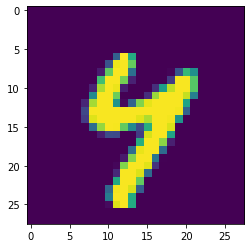

In [5]:
# print random image from training set
import random
num = random.randint(0, len(x_train))
plt.imshow(x_train[num])
print(f"The correct label is {y_train[num]}")

In [6]:
# Reshape data to add a channel dimension when using convolutional layer
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [7]:
# create the model architecture
shape = (28, 28, 1)
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=shape),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
     # Add the output layer with 10 units (one for each digit from 0-9)
    layers.Dense(10, activation='softmax')
])

In [8]:
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# train model
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.0448 - val_accuracy: 0.9878
Epoch 2/3
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 0.0474 - val_accuracy: 0.9879
Epoch 3/3
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0596 - val_accuracy: 0.9889


In [11]:
# evaluate model
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0596 - accuracy: 0.9889


[0.0595799945294857, 0.9889000058174133]